In [ ]:
import torch as t
import torch.nn as nn
from tqdm import tqdm
import w1d4_tests
import matplotlib.pyplot as plt
from PIL import Image
import einops

gin.enter_interactive_mode()

In [ ]:
from comet_ml import Experiment

# Create an experiment with your api key


COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: torch, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/winston-bosan/general/375851c73b154f4daf79aa7812f8f1c6



In [ ]:
## Hello1 
# Yep! I am tying alright! 

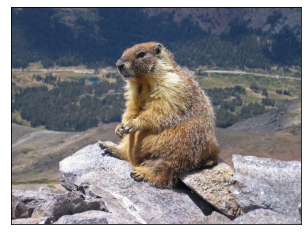

In [ ]:
fname = 'marmot.jpg'
w1d4_tests.plot_image(fname)
data_train, data_test =  w1d4_tests.load_image(fname)

In [ ]:
class ThreeLayerMLP(nn.Module):
    def __init__(self, P, H, K, n_layers=3):
        super().__init__()
        
        temp_list_of_linear_and_relus = []
        for _ in range(n_layers):
            temp_list_of_linear_and_relus.append(nn.Linear(H, H))
            temp_list_of_linear_and_relus.append(nn.ReLU())
            
        self.layers = nn.Sequential(
            nn.Linear(P, H),
            nn.ReLU(),
            *temp_list_of_linear_and_relus,
            nn.Linear(H, K)
        )
        
    def forward(self, x):
         return self.layers(x)
    
w1d4_tests.test_mlp(ThreeLayerMLP)

Your module returns different results from the example solution.


In [ ]:
def _train(model, dataloader, lr, momentum):
    optimizer = t.optim.SGD(model.parameters(), lr, momentum)
    loss_fn = nn.L1Loss()
    
    for x, y in dataloader:
        optimizer.zero_grad()
        y_hat = model(x)
        loss = loss_fn(y_hat, y)
        loss.backward()
        optimizer.step()
    
    return model

w1d4_tests.test_train(_train)

Congrats! You've passed the test.


In [ ]:
def evaluate(model, dataloader):
    loss_fn = nn.L1Loss()
    total_loss = 0
    for i, (x, y) in enumerate(dataloader):
        total_loss += loss_fn(model(x), y)
    
    return total_loss / (i + 1)

w1d4_tests.test_evaluate(evaluate)

Congrats! You've passed the test.


100%|██████████| 100/100 [00:44<00:00,  2.24it/s]


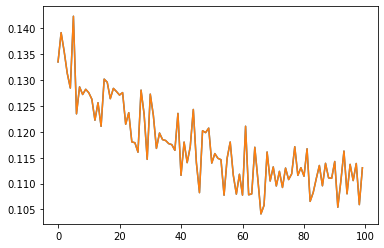

In [ ]:
n_epochs = 100
lr, momentum = 0.1, 0.5

model = ThreeLayerMLP(2, 400, 3)

train_loss, test_loss = [], []
for epoch in tqdm(range(n_epochs)):
    data_train, data_test =  w1d4_tests.load_image(fname)    
    model = train(model, data_train, lr, momentum)
    train_loss.append(evaluate(model, data_test).detach().numpy())
    test_loss.append(evaluate(model, data_test).detach().numpy())
    
plt.plot(range(n_epochs), train_loss)
plt.plot(range(n_epochs), test_loss)

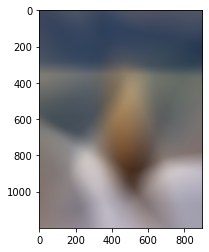

In [ ]:
img = Image.open(fname)
width, height = img.size
del img

x1_coords = t.linspace(-0.5, 0.5, width)
x2_coords = t.linspace(-0.5, 0.5, height)

grid = t.stack( (x1_coords.repeat((height, 1)).T, x2_coords.repeat((width, 1))) )
grid = einops.rearrange(grid, 'p w h -> (w h) p')

y_hat = model(grid)
y_hat = einops.rearrange(y_hat + 0.5, '(w h) c -> w h c', w=width)

plt.imshow(y_hat.detach().numpy())

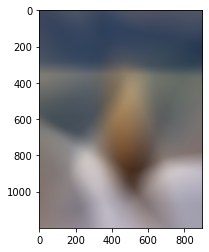

## Rosenbrock

/home/ubuntu/.local/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


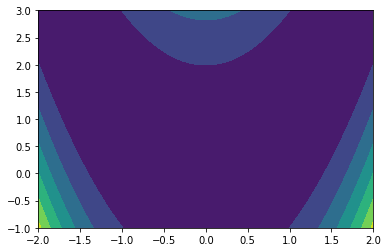

In [ ]:
def f(x, y, a=1, b=100):
    return (a-x)**2 + b*(y-x**2)**2 + 1

n = 100
x_grid, y_grid = t.meshgrid(
    t.linspace(-2, 2, n), 
    t.linspace(-1, 3, n)
)

plt.contourf(x_grid, y_grid, f(x_grid, y_grid))

# Looks wrong but whatever


Testing configuration:  {'lr': 0.001, 'momentum': 0.0, 'n_iter': 10}
Congrats! You've passed the test.

Testing configuration:  {'lr': 0.001, 'momentum': 0.8, 'n_iter': 20}
Congrats! You've passed the test.


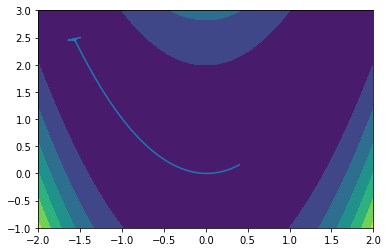

In [ ]:
def opt_rosenbrock(xy, lr, momentum, n_iter):
    optimizer = t.optim.SGD([xy], lr, momentum)   
    
    vals = [xy.clone().detach()]
    for i in range(n_iter):
        optimizer.zero_grad()
        f(*xy).backward()
        optimizer.step()
        vals.append(xy.clone().detach())
    
    return t.stack(vals)

w1d4_tests.test_rosenbrock(opt_rosenbrock)

plt.contourf(x_grid, y_grid, f(x_grid, y_grid))

xy = t.Tensor([-1.5, 2.5])
xy.requires_grad = True
vals = opt_rosenbrock(xy, 0.001, 0.5, 1000)

plt.plot(*vals.T)

## Weight decay

In [ ]:
vals

tensor([[-1.5000,  2.5000],
        [-1.6450,  2.4500],
        [-1.5437,  2.4762],
        ...,
        [ 0.3975,  0.1550],
        [ 0.3989,  0.1562],
        [ 0.4004,  0.1574]])

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: torch, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/winston-bosan/general/f8efc4bf27fd42bc8f9749c849af7237

100%|██████████| 30/30 [00:13<00:00,  2.29it/s]
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/winston-bosan/general/f8efc4bf27fd42bc8f9749c849af7237
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     training loss [30] : (0.12483716756105423, 0.13549786806106567)

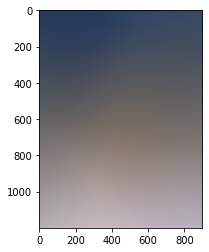

In [ ]:
import gin

experiment = Experiment(
    api_key="BqQbt7OiPG0nJ1M3dtHQqB0Wk",
    project_name="general",
    workspace="winston-bosan",
)

@gin.configurable
def train(epochs, num_epochs, learning_rate, momentum, loss, hidden_size, n_layers):
    n_epochs = num_epochs
    lr, momentum = learning_rate, momentum
    
    hyper_params = {
        "epochs": epochs, 
        "num_epochs": num_epochs, 
        "learning_rate": learning_rate, 
        "momentum": momentum, 
        "loss": loss, 
        "hidden_size": hidden_size
    }
    experiment.log_parameters(hyper_params)

    model = ThreeLayerMLP(2, hidden_size, 3, n_layers)

    train_loss, test_loss = [], []
    data_train, data_test =  w1d4_tests.load_image(fname)    
        
    for epoch in tqdm(range(n_epochs)):
        model = _train(model, data_train, lr, momentum)
        training_loss = evaluate(model, data_test).detach().numpy()
        train_loss.append(training_loss)
        test_loss.append(evaluate(model, data_test).detach().numpy())
        experiment.log_metric("training loss", training_loss, step=epoch)
    
    return model

if __name__ == "__main__":
    with gin.unlock_config():
        gin.parse_config_file(config_file="config.gin")
        model = train()  
        experiment.end()
        img = Image.open(fname)
        width, height = img.size
        del img

        x1_coords = t.linspace(-0.5, 0.5, width)
        x2_coords = t.linspace(-0.5, 0.5, height)

        grid = t.stack( (x1_coords.repeat((height, 1)).T, x2_coords.repeat((width, 1))) )
        grid = einops.rearrange(grid, 'p w h -> (w h) p')

        y_hat = model(grid)
        y_hat = einops.rearrange(y_hat + 0.5, '(w h) c -> w h c', w=width)

        plt.imshow(y_hat.detach().numpy())

In [ ]:
model.layers

Sequential(
  (0): Linear(in_features=2, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=512, bias=True)
  (5): ReLU()
  (6): Linear(in_features=512, out_features=512, bias=True)
  (7): ReLU()
  (8): Linear(in_features=512, out_features=512, bias=True)
  (9): ReLU()
  (10): Linear(in_features=512, out_features=512, bias=True)
  (11): ReLU()
  (12): Linear(in_features=512, out_features=512, bias=True)
  (13): ReLU()
  (14): Linear(in_features=512, out_features=512, bias=True)
  (15): ReLU()
  (16): Linear(in_features=512, out_features=512, bias=True)
  (17): ReLU()
  (18): Linear(in_features=512, out_features=512, bias=True)
  (19): ReLU()
  (20): Linear(in_features=512, out_features=512, bias=True)
  (21): ReLU()
  (22): Linear(in_features=512, out_features=3, bias=True)
)

In [ ]:
def cartesian_product(*args):
    pools = [tuple(pool) for pool in args]
    # print(pools)
    result = [[]]
    for pool in pools:
        # Woah what is this black magic
        result = [x+[y] for x in result for y in pool]
    for prod in result:
        yield tuple(prod)
        
def make_grid(possible_values): 
    holder = []
    for combo in cartesian_product(*possible_values.values()):
        # print(combo)
        holder.append(dict(zip(possible_values.keys(), combo)))
    return holder

    
gen = make_grid({
  "train.lr":          [1e-1, 1e-3, 3],
  "Model.hidden_size": [768, 1024],
  # "something": ['cat', 'dog', 'moose', 'hamster', 'rabbit']
})

print(gen)

[{'train.lr': 0.1, 'Model.hidden_size': 768}, {'train.lr': 0.1, 'Model.hidden_size': 1024}, {'train.lr': 0.001, 'Model.hidden_size': 768}, {'train.lr': 0.001, 'Model.hidden_size': 1024}, {'train.lr': 3, 'Model.hidden_size': 768}, {'train.lr': 3, 'Model.hidden_size': 1024}]
